In [2]:
#Homework 9: Optimization  - Abraham Cepeda Oseguera - BUID: U75425818

In [1]:
#Problem 1.
import numpy as np
from numpy.linalg import eig

A = np.array([[2,10,-2],[10,5,8],[-2,8,11]])

w,v = eig(A)

print("A eigenvalues = ", w)


A eigenvalues =  [-9.  9. 18.]


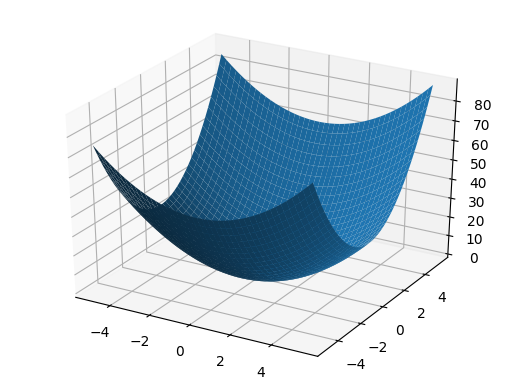

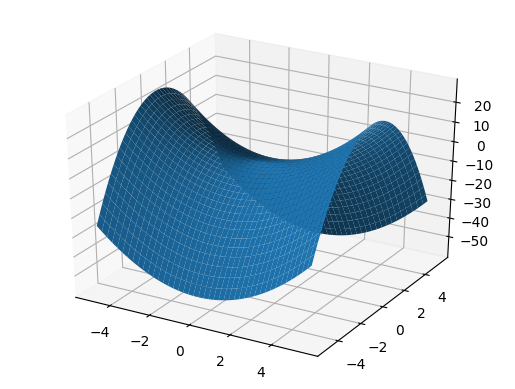

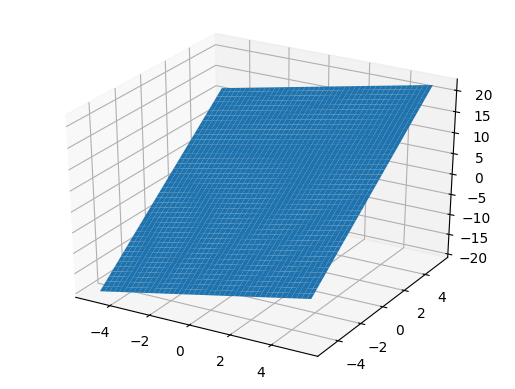

In [2]:
#Problem 2.
from pylab import *
from mpl_toolkits.mplot3d import Axes3D

x, y = meshgrid(arange(-5, 5.5, 0.05), arange ( -5 , 5.5 , 0.05))
f = x**2 + 2*(y **2)
g = x**2 - 2*(y **2)
h = x + 3*y

ax = gca(projection="3d")
ax.plot_surface(x, y, f)
show()

ax2 = gca(projection="3d")
ax2.plot_surface(x, y, g)
show()

ax3 = gca(projection="3d")
ax3.plot_surface(x, y, h)
show()

     fun: -1.0
    nfev: 13
     nit: 8
 success: True
       x: -0.9999999955359995
     fun: nan
    nfev: 40
     nit: 36
 success: False
       x: 2.6180339603380443
     fun: 0.289273423937778
    nfev: 16
     nit: 12
 success: True
       x: 1.4102454824377297


/Users/abrahamcepedaoseguera/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]


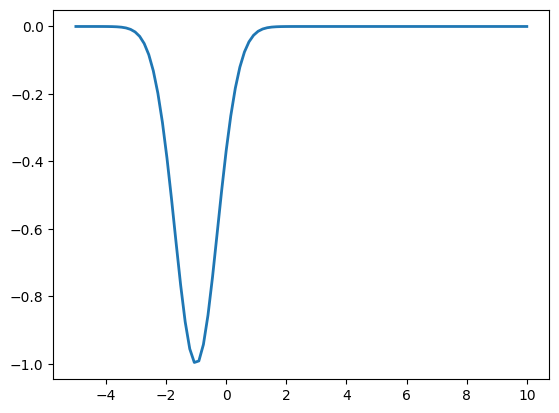

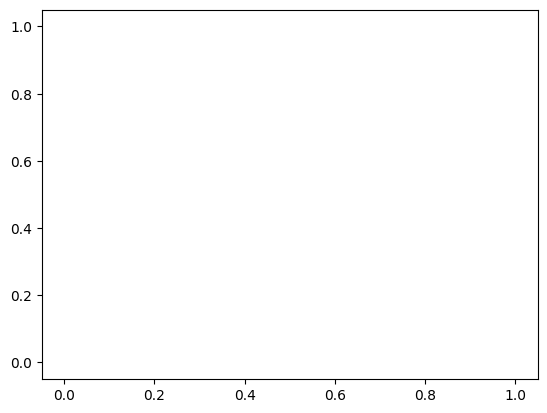

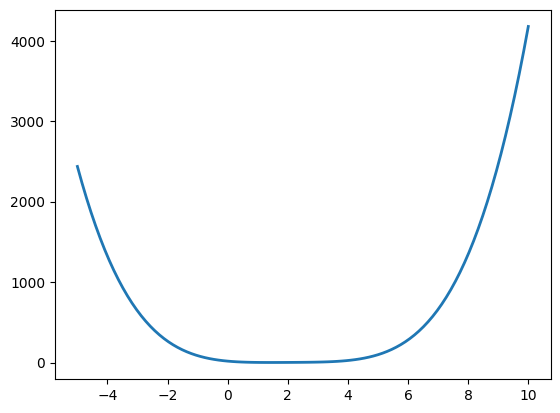

In [3]:
#Problem 3.
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

np.random.seed (0)
x = np.linspace(-5, 10, 100)

def f(x):
    return -np.exp(-(x+1)**2)

def g(x):
    return np.log(-(x+1)**2)

def h(x):
    return ((x-2)**4) + ((x-1)**2) 

                
result = optimize.minimize_scalar(f)
print(result)

result = optimize.minimize_scalar(g)
print(result)

result = optimize.minimize_scalar(h)
print(result)

plt.plot(x, f(x), linewidth =2)
plt.show()

plt.plot(x, g(x), linewidth =2)
plt.show()

plt.plot(x, h(x), linewidth =2)
plt.show()


In [4]:
#Problem 4.
import picos as pc
x = pc.RealVariable("x", 1) # Real variable x
y = pc.RealVariable("y", 1) # Real variable y

problem = pc.Problem ()
problem.minimize = x**2 + 2*(y **2)
problem += x >= 0
problem += y >= 0
problem += x + y == 1


problem.solve(solver = "cvxopt")
opt = problem.value

print("sol = ", opt)
print("x = ", x.value)
print("y = ", y.value)

sol =  0.6666666666675275
x =  0.6666672022959466
y =  0.3333327977040535


     con: array([], dtype=float64)
     fun: 0.0
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([20.,  5., 12.])
  status: 0
 success: True
       x: array([0., 0.])
The minimum value of the objective function is not one of the candidate vertices


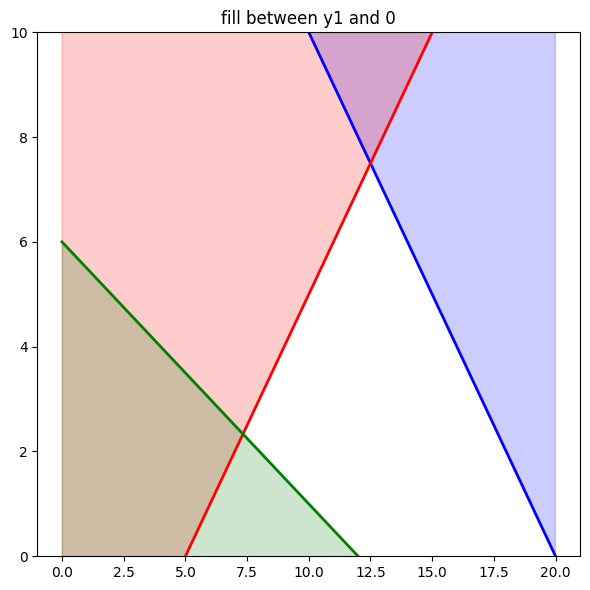

In [5]:
#Problem 5.
import matplotlib.pyplot as plt
from scipy.optimize import linprog

x = np.arange(0.0, 20, 0.01)
y1 = 20 - x
y2 = -5 + x
y3 = 6 - x/2

fig, (ax1) = plt.subplots(1, 1, sharex=True, figsize=(6, 6))


plt.fill_between(x, y1, 20, color='b', alpha=0.2)
ax1.plot(x, y1, 'b-', lw=2)

plt.fill_between(x, y2, 20, color='r', alpha=0.2)
ax1.plot(x, y2, 'r-', lw=2)

plt.fill_between(x, y3, -5, color='g', alpha=0.2)
ax1.plot(x, y3, 'g-', lw=2)
ax1.set_title('fill between y1 and 0')

#set y lim to 0
ax1.set_ylim(0, 10)

fig.tight_layout()


obj = [ 1 , 3]
lhs_ineq = [[ 1 , 1] , [ 1 , -1] , [1 , 2]]
rhs_ineq = [20 , 5 , 12]
bnd = [(0 , float ("inf")) ,(0 , float ("inf" ))]
opt = linprog (c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq, bounds=bnd, method="simplex")
print(opt)

print("The minimum value of the objective function is not one of the candidate vertices")

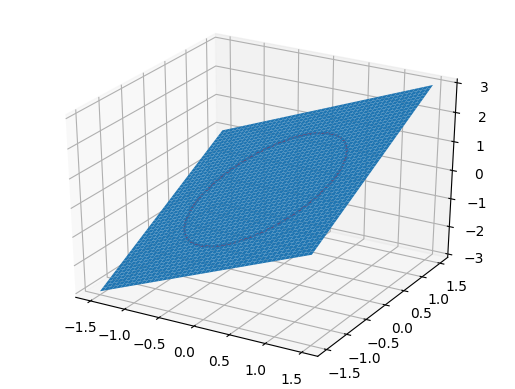

[-0.33333333  0.33333333  0.66666667] 0.3333333333333333
[-0.33333333  0.33333333  0.66666667] 0.33333333333333337


In [6]:
#Problem 6.

import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

x = np.linspace(-1.5, 1.5)
[X, Y] = np.meshgrid(x, x)

fig = plt.figure()
ax = fig.gca(projection='3d') 
ax.plot_surface(X, Y, X + Y)
theta = np.linspace(0,2*np.pi);
R = 1.0
x1 = R * np.cos(theta)
y1 = R * np.sin(theta)
ax.plot(x1, y1, x1 + y1, 'r-') 
plt.show()


def func(X):
    x = X[0]
    y = X[1]
    L = X[2] 
    return x**2 + 2*y**2 + L * (x - 2*y + 1)

def dfunc(X):
    dLambda = np.zeros(len(X))
    h = 1e-3 # this is the step size used in the finite difference.
    for i in range(len(X)):
        dX = np.zeros(len(X))
        dX[i] = h
        dLambda[i] = (func(X+dX)-func(X-dX))/(2*h);
    return dLambda


# this is the max
X1 = fsolve(dfunc, [1, 1, 0])
print(X1, func(X1))

# this is the min
X2 = fsolve(dfunc, [-1, -1, 0])
print(X2, func(X2))